In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-05-10 19:24:44.470954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746894284.490090  270182 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746894284.495705  270182 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746894284.510985  270182 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746894284.511011  270182 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746894284.511014  270182 computation_placer.cc:177] computation placer alr

In [2]:
vocab_size=1000
embedding_dim=16
max_length=120
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"
training_portion=.8  # 50% training 20 % val

In [3]:
sentences=[]
labels=[]
stopwords=[    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", 
    "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", 
    "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", 
    "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", 
    "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", 
    "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", 
    "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", 
    "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
    "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", 
    "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", 
    "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
    "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", 
    "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", 
    "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", 
    "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", 
    "yourself", "yourselves"]

print(len(stopwords))

153


In [4]:
with open("/home/ragab/Desktop/TENSOR/BBC News.csv",'r')as csvfile:
    reader=csv.reader(csvfile,delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence=row[1]
        for word in stopwords:
            token=" "+word+" "
            sentence =sentence.replace(token," ")
        sentences.append(sentence)



print(len(labels))
print(len(sentences))
print(sentences[0])


2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [5]:
train_size=int(len(sentences)*training_portion)
train_sentences=sentences[:train_size]
train_labels=labels[:train_size]

validation_sentences=sentences[train_size:]
validation_labels=labels[train_size:]


print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [8]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

train_sequences=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,padding=padding_type,maxlen=max_length)


print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [10]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
num_epochs=30
history=model.fit(train_padded,training_label_seq,epochs=num_epochs,validation_data=(validation_padded,validation_label_seq),verbose=2)

Epoch 1/30
56/56 - 1s - 17ms/step - accuracy: 0.2225 - loss: 1.7411 - val_accuracy: 0.2292 - val_loss: 1.6922
Epoch 2/30
56/56 - 0s - 2ms/step - accuracy: 0.2539 - loss: 1.6524 - val_accuracy: 0.2382 - val_loss: 1.6201
Epoch 3/30
56/56 - 0s - 3ms/step - accuracy: 0.3056 - loss: 1.5692 - val_accuracy: 0.5124 - val_loss: 1.5235
Epoch 4/30
56/56 - 0s - 2ms/step - accuracy: 0.5747 - loss: 1.4709 - val_accuracy: 0.7438 - val_loss: 1.4240
Epoch 5/30
56/56 - 0s - 2ms/step - accuracy: 0.6978 - loss: 1.3562 - val_accuracy: 0.8697 - val_loss: 1.2971
Epoch 6/30
56/56 - 0s - 2ms/step - accuracy: 0.7365 - loss: 1.2134 - val_accuracy: 0.8315 - val_loss: 1.1548
Epoch 7/30
56/56 - 0s - 2ms/step - accuracy: 0.8388 - loss: 1.0547 - val_accuracy: 0.8337 - val_loss: 1.0154
Epoch 8/30
56/56 - 0s - 2ms/step - accuracy: 0.8528 - loss: 0.9044 - val_accuracy: 0.8562 - val_loss: 0.8777
Epoch 9/30
56/56 - 0s - 2ms/step - accuracy: 0.8848 - loss: 0.7616 - val_accuracy: 0.8854 - val_loss: 0.7478
Epoch 10/30
56/56 

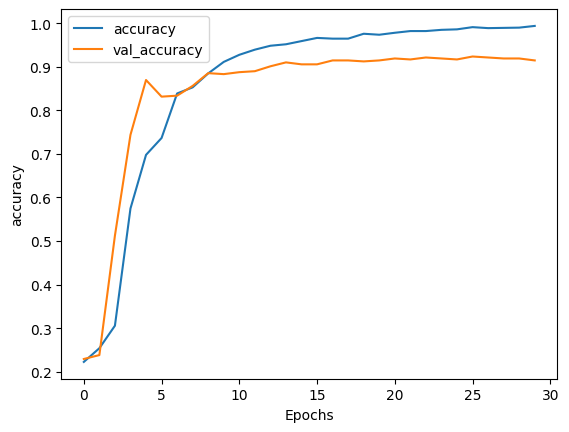

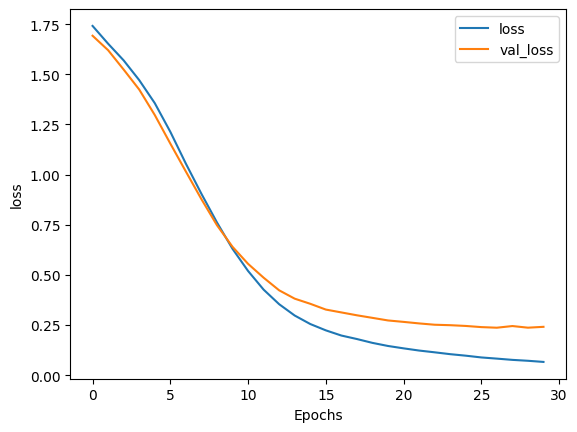

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history,"accuracy")
plot_graphs(history,"loss")